# Survival analysis tutorial =D

Welcome to the survival analysis tutorial!

Once again, this is my learning journal for survival analysis.

I used a lot from the official Lifelines documentation (please refer to https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html), including the same examples.

The only thing I did was maybe writing down in a little more non-technical way.

Hope you have fun =D

# Basic First and Foremost STUFF in Python

First, let me just tell python to publish everything in here and not in separate windows!

In [47]:
%matplotlib inline

And let me just import the basic stuff

In [48]:
import pandas as pd
import numpy as np
import matplotlib as m

# Installing the library and importing the data

In [1]:
!pip install lifelines #remember, this is STEP 1 if you do not have the package!

    100% |████████████████████████████████| 440kB 1.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for lifelines ... - \ done
  Stored in directory: /Users/anagarcia/Library/Caches/pip/wheels/16/51/00/0811c3f15a8d62e5dcacc64f85361cce51c67a94f61ad07b68
Successfully built lifelines


Now, let's import from sample data!

In [7]:
from lifelines.datasets import load_waltons
df = load_waltons()
df.head(5)

,T,E,group
0,6.0,1,miR-137
1,13.0,1,miR-137
2,13.0,1,miR-137
3,13.0,1,miR-137
4,19.0,1,miR-137


In this data, we have three columns: T is the time since patient was born. E is a dummy variable that indicates
if the patient is dead (1) or not (0). Group is a variable that identifies two different groups.

Important! In your real-world analysis, you can use whatever time unit you like, as long as it is the same throught the whole period =D

# Implanting the Kaplan Meier Method - just one group

First, let's import from lifelines the KaplanMeierFitter

In [11]:
from lifelines import KaplanMeierFitter

Python is not as beautiful as R, remember? Well, we will have to separate the columns that indicate the time
the patient has lived and the dummy variable saying if he died or not in two data frames.
Those will be the parameters for the analysis. Once we do that, we can fit the survival method!

Let's?

In [34]:
T = df["T"]
E = df["E"]

kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E) #important! by default, KaplanMeierFitter assumes that everyone has died, 
#if you do not put the event observed parameter.

<lifelines.KaplanMeierFitter: fitted with 163 observations, 7 censored>

Ok! Now, let's plot the survival curve!

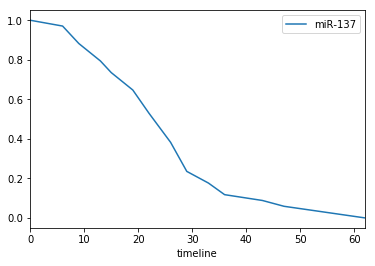

In [46]:
kmf.survival_function_.plot()

#fit.title('Survival function of political regimes');

If we want to see the confidence intervals, we can just change the function

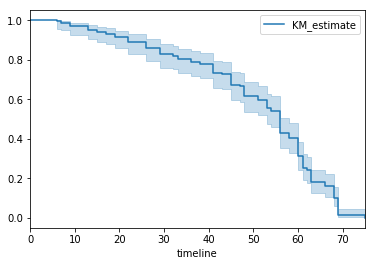

In [36]:
kmf.plot()

There is a property that defines what is the time when half of the population has expired!

In [37]:
kmf.median_

56.0

# Implanting the Kaplan Meier Method - two groups

One thing that is beautiful and interesting in the Survival Analysis is to compare how one group's curve compares
to other group's curve.

It's not that difficult to implement that on Python!

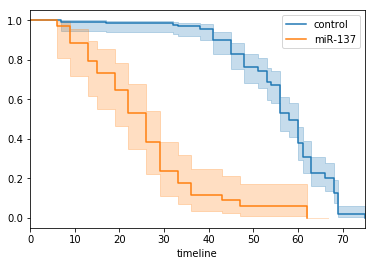

In [38]:
#Step 1 - lets separate the groups in our dataset

groups = df['group']
ix = (groups == 'miR-137')

#Step 2 - fit the curves
kmf.fit(T[~ix], E[~ix], label='control') #look! this is just the data.frame T we created - de ix part 
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='miR-137')
kmf.plot(ax=ax)


Ok, but now let's say you don't want to see the results just graphically? What if you want a table? So there you go:

In [44]:
print (kmf.survival_function_)

           miR-137
timeline          
0.0       1.000000
6.0       0.970588
9.0       0.882353
13.0      0.794118
15.0      0.735294
19.0      0.647059
22.0      0.529412
26.0      0.382353
29.0      0.235294
33.0      0.176471
36.0      0.117647
43.0      0.088235
47.0      0.058824
62.0      0.000000


# Implanting the Nelson-Aalen Method

This is a useful method if we want to estimate the hazard function (it is like the opposite of the survival function). You can not do this using the Kaplan-Meier because of Statistics reasons, so we have to change the method.

In [49]:
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter: fitted with 163 observations, 7 censored>

Ok, now we can plot the hazard curve.


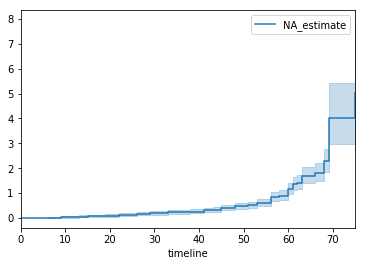

In [50]:
naf.plot() #Let's make the survival plot before

What is that? Well, it is very complicated to understand the maths behind it, but what it basically is showing is how fast (accordingly to the steepness of the curve) the individuals die! We can transform this in the percentage curve we saw before but it involves a smoothness method and us to specify a interval of the graph. Let's see how it is done!

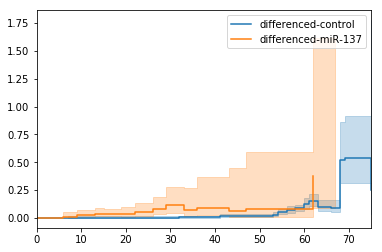

In [57]:
b = 3. #this argument is necessary. It represents the bandwidth
naf.fit(T[~ix], E[~ix], label='control')
ax = naf.plot_hazard(bandwidth=b)
naf.fit(T[ix], E[ix], label='miR-137')
naf.plot_hazard(ax=ax, bandwidth=b)

Ok, apparently the bandwidth we chose makes a huuuge difference, so, honestly, just stick to the hazard function (words of the Lifelines project =oOOOO)

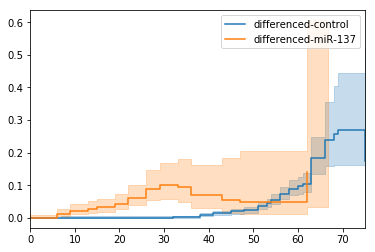

In [58]:
b = 8. #this argument is necessary. It represents the bandwidth
naf.fit(T[~ix], E[~ix], label='control')
ax = naf.plot_hazard(bandwidth=b)
naf.fit(T[ix], E[ix], label='miR-137')
naf.plot_hazard(ax=ax, bandwidth=b)

# Survival regression

One thing that made me fall in love for survival analysis was its simplicity, in spite of being very complicated behind. We are simply interested in getting survival rates of the population based on the times different individuals survived.

But, what if we have a bunch of other variables about those individuals and we want to put this into the model?

That is where survival regression goes into.

We have two ways of estimating this regression:

Cox's exponential model : λ(t)=b0(t)exp(b1x1+...+bNxn)

Aalen's additive model : λ(t)=b0(t)+b1(t)x1+...+bN(t)xT.

Let's see how we estimate those

In [59]:
from lifelines import AalenAdditiveFitter

Let's use a dataset that has more information about the individuals. This is a dataset of different political regimes.

In [62]:
import pandas as pd
import lifelines

data = lifelines.datasets.load_dd()
data.head(5)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In order to run the regression, we have to create a covariance matrix of the variables!

In [63]:
import patsy
# the '-1' term
# refers to not adding an intercept column (a column of all 1s).
# It can be added to the Fitter class.
X = patsy.dmatrix('un_continent_name + regime + start_year -1', data, return_type='dataframe')

Now, let's create the model.

In [65]:
aaf = AalenAdditiveFitter(coef_penalizer=1.0, fit_intercept=True)
X['T'] = data['duration']
X['E'] = data['observed']
aaf.fit(X, 'T', event_col='E')

 [-----------------100%-----------------] 1468 of 1468 complete in 0.7 sec


<lifelines.AalenAdditiveFitter: fitted with 1808 observations, 340 censored>

What it does now is that it displays the cummulative hazard function per the different regimes

In [66]:
aaf.cumulative_hazards_.head()

,un_continent_name[Africa],un_continent_name[Americas],un_continent_name[Asia],un_continent_name[Europe],un_continent_name[Oceania],regime[T.Military Dict],regime[T.Mixed Dem],regime[T.Monarchy],regime[T.Parliamentary Dem],regime[T.Presidential Dem],start_year,baseline
1,-0.051595,-0.082406,0.010666,0.154493,-0.060438,0.075333,0.086274,-0.133938,0.048077,0.127171,0.000116,-0.029280
2,-0.014713,-0.039471,0.095668,0.194251,-0.092696,0.115033,0.358702,-0.226233,0.168783,0.121862,0.000053,0.143039
3,0.007389,-0.064758,0.115121,0.170549,0.069371,0.161490,0.677347,-0.271183,0.328483,0.146234,0.000004,0.297672
4,-0.058418,0.011399,0.091784,0.205824,0.125722,0.220028,0.932674,-0.294900,0.365604,0.422617,0.000002,0.376311
5,-0.099282,0.106641,0.112083,0.150708,0.091900,0.241575,1.123860,-0.391103,0.536185,0.743913,0.000057,0.362049


I can also plot to see how hazard compares among the different categories!

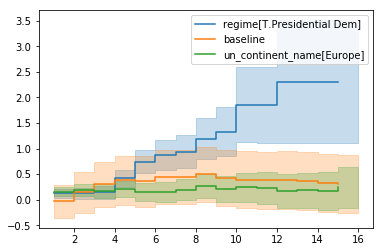

In [67]:
aaf.plot( columns=[ 'regime[T.Presidential Dem]', 'baseline', 'un_continent_name[Europe]' ], ix=slice(1,15) )

# Implementing CoxPlot

This is great because in the end you have some sort of coefficient table =O

Let's first import some data =D

In [75]:
from lifelines.datasets import load_rossi
from lifelines import CoxPHFitter

rossi_dataset = load_rossi()
rossi_dataset.head(4)

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1


Now, step 2, let's do the regression!

In [78]:
cf = CoxPHFitter()
cf.fit(rossi_dataset, 'week', event_col='arrest')
cf.print_summary()

n=432, number of events=114

           coef  exp(coef)  se(coef)          z         p  lower 0.95  upper 0.95    
fin  -1.899e-01  8.270e-01 9.580e-02 -1.983e+00 4.742e-02  -3.777e-01  -2.124e-03   *
age  -3.511e-01  7.039e-01 1.345e-01 -2.611e+00 9.029e-03  -6.148e-01  -8.749e-02  **
race  1.031e-01  1.109e+00 1.012e-01  1.019e+00 3.081e-01  -9.522e-02   3.014e-01    
wexp -7.421e-02  9.285e-01 1.051e-01 -7.058e-01 4.803e-01  -2.803e-01   1.319e-01    
mar  -1.425e-01  8.672e-01 1.254e-01 -1.136e+00 2.561e-01  -3.883e-01   1.034e-01    
paro -4.128e-02  9.596e-01 9.522e-02 -4.336e-01 6.646e-01  -2.280e-01   1.454e-01    
prio  2.650e-01  1.303e+00 8.296e-02  3.194e+00 1.403e-03   1.023e-01   4.276e-01  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Concordance = 0.640


In [79]:
cf.hazards_ #this way we can access the coefficients

,fin,age,race,wexp,mar,paro,prio
coef,-0.189931,-0.351138,0.103102,-0.074208,-0.142453,-0.041284,0.264982


In [80]:
cf.baseline_hazard_ #this way we can access the baseline hazard

,baseline hazard
event_at,
0.0,0.000000
1.0,0.000536
2.0,0.000538
3.0,0.000539
4.0,0.000542
5.0,0.000543
6.0,0.000546
7.0,0.000549
8.0,0.002749


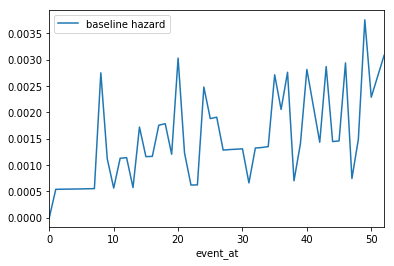

In [82]:
cf.baseline_hazard_.plot() #this way we can plot the baseline hazard

cf.hazards_.plot()

But how can we evaluate those models? Well, one way is the c-index, or concordance-index. This measure evaluates the ordering of predicted times: how correct is the ordering? It is infact a generalization of AUC, another common loss function, and is interpretted similarly:

0.5 is the expected result from random predictions,
1.0 is perfect concordance and,
0.0 is perfect anti-concordance (multiply predictions with -1 to get 1.0)

In [86]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_regression_dataset
from lifelines.utils import k_fold_cross_validation

regression_dataset = load_regression_dataset()
cf = CoxPHFitter()
scores = k_fold_cross_validation(cf, regression_dataset, 'T', event_col='E', k=3)
print (scores)
print (np.mean(scores))
print (np.std(scores))

[0.52559726962457343, 0.57995110024449881, 0.58687258687258692]
0.564140318914
0.0274001427086
